In [1]:
import nltk
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Tagged_Review
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('I', 'PRP'), ('feel', 'VBP'), ('so', 'RB'), ..."
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('nice', 'JJ'), ('phone,', 'NN'), ('nice', 'J..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,"[('Very', 'RB'), ('pleased', 'JJ')]"
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[('It', 'PRP'), ('works', 'VBZ'), ('good', 'JJ..."
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[('Great', 'NNP'), ('phone', 'NN'), ('to', 'TO..."


In [5]:
df.tail()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Tagged_Review
413835,413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,"[('another', 'DT'), ('great', 'JJ'), ('deal', ..."
413836,413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,"[('Ok', 'NN')]"
413837,413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,"[('Passes', 'NNS'), ('every', 'DT'), ('drop', ..."
413838,413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,"[('I', 'PRP'), ('returned', 'VBD'), ('it', 'PR..."
413839,413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0,"[('Only', 'RB'), ('downside', 'NN'), ('is', 'V..."


In [6]:
df.shape

(413840, 8)

In [7]:
df.isnull().sum()

Unnamed: 0           0
Product Name         0
Brand Name       65171
Price             5933
Rating               0
Reviews             62
Review Votes     12296
Tagged_Review        0
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

Brand Name       65171
Review Votes     12296
Price             5933
Reviews             62
Unnamed: 0           0
Product Name         0
Rating               0
Tagged_Review        0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
# Unique ratings
df["Rating"].value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

In [12]:
df[df["Rating"]!= 3]

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Tagged_Review
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('I', 'PRP'), ('feel', 'VBP'), ('so', 'RB'), ..."
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('nice', 'JJ'), ('phone,', 'NN'), ('nice', 'J..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,"[('Very', 'RB'), ('pleased', 'JJ')]"
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[('It', 'PRP'), ('works', 'VBZ'), ('good', 'JJ..."
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[('Great', 'NNP'), ('phone', 'NN'), ('to', 'TO..."
...,...,...,...,...,...,...,...,...
413832,413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,good rugged phone that has a long-lasting batt...,0.0,"[('good', 'JJ'), ('rugged', 'VBD'), ('phone', ..."
413834,413834,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,used hard,0.0,"[('used', 'VBN'), ('hard', 'RB')]"
413835,413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,"[('another', 'DT'), ('great', 'JJ'), ('deal', ..."
413837,413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,"[('Passes', 'NNS'), ('every', 'DT'), ('drop', ..."


In [13]:
df = df[df["Rating"]!= 3]

In [14]:
df["Rating"].value_counts()

5    180253
1     57535
4     50421
2     20068
Name: Rating, dtype: int64

In [16]:
df["Positively Rated"]= np.where(df["Rating"] > 3, 1, 0)

In [17]:
df.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Tagged_Review,Positively Rated
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('I', 'PRP'), ('feel', 'VBP'), ('so', 'RB'), ...",1
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('nice', 'JJ'), ('phone,', 'NN'), ('nice', 'J...",1
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,"[('Very', 'RB'), ('pleased', 'JJ')]",1
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[('It', 'PRP'), ('works', 'VBZ'), ('good', 'JJ...",1
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[('Great', 'NNP'), ('phone', 'NN'), ('to', 'TO...",1


In [18]:
df['Positively Rated'].value_counts()

1    230674
0     77603
Name: Positively Rated, dtype: int64

C:\Users\Bhupesh.Marathe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

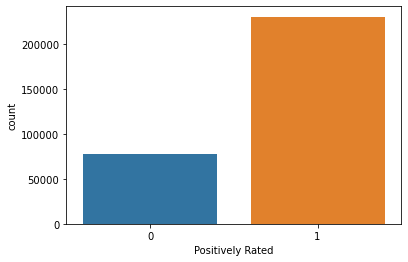

In [19]:
sns.countplot(df["Positively Rated"])

In [20]:
df['Positively Rated'].describe()

count    308277.000000
mean          0.748269
std           0.434008
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Positively Rated, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df["Reviews"], df["Positively Rated"],
                                                   random_state=0)

In [23]:
print(X_train)

97039     I bought a BB Black and was deliveried a White...
243783    overall i am very happy so far with this phone...
88792     the keyboard stutters! after i made a research...
388802    excellent smart phone, good performance. all p...
161607    I received my new Blu Vivo 5 Smartphone 3 days...
                                ...                        
159246                                            excellent
408347    Works great. Just waiting for my upgrade so I ...
197432    Although I'm only 26 I'm kind of a backwoods h...
153503              for the money not bad, but cheaply made
410159    broke it to quick tho now i need to get anothe...
Name: Reviews, Length: 231207, dtype: object


In [24]:
X_train[0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vect = CountVectorizer().fit(X_train)

In [28]:
print(vect)

CountVectorizer()


In [29]:
vect.get_feature_names()[::1000]

['00',
 '2048those',
 '4less',
 '99303',
 'adr6275',
 'andentering',
 'assignment',
 'bandwidth',
 'blazingly',
 'bullets',
 'cassettes',
 'cleary',
 'condishion',
 'cpl',
 'debi',
 'deғιnιтely',
 'dollarsshipping',
 'ele',
 'esteem',
 'eyeglasses',
 'flashy',
 'fusion2',
 'gorila',
 'hasbro',
 'human',
 'inefficiencies',
 'irullu',
 'kinds',
 'like',
 'makeup',
 'microsaudered',
 'msgi',
 'nightmarish',
 'oldy',
 'p770',
 'phalet',
 'poori',
 'productsaid',
 'quirky',
 'rediculoius',
 'responseive',
 'sadness',
 'send',
 'sir',
 'sos',
 'storecons',
 'synch',
 'them',
 'trace',
 'unconditional',
 'utiles',
 'waiste',
 'withstanding',
 'zeis']

In [30]:
len(vect.get_feature_names())

53216

In [31]:
X_train_vectorized = vect.transform(X_train)

In [33]:
X_train_vectorized

<231207x53216 sparse matrix of type '<class 'numpy.int64'>'
	with 6117776 stored elements in Compressed Sparse Row format>

In [34]:
print(X_train_vectorized)

  (0, 4986)	1
  (0, 7259)	2
  (0, 7676)	1
  (0, 7878)	1
  (0, 8476)	1
  (0, 9637)	1
  (0, 14420)	1
  (0, 26003)	2
  (0, 31892)	1
  (0, 32284)	1
  (0, 33437)	1
  (0, 37356)	1
  (0, 38473)	1
  (0, 42146)	1
  (0, 46946)	1
  (0, 47462)	1
  (0, 47639)	1
  (0, 51169)	1
  (0, 51673)	1
  (1, 142)	1
  (1, 807)	1
  (1, 860)	1
  (1, 1960)	2
  (1, 2372)	1
  (1, 3696)	1
  :	:
  (231205, 32284)	1
  (231205, 46946)	1
  (231206, 4986)	1
  (231206, 5188)	1
  (231206, 5868)	1
  (231206, 8751)	1
  (231206, 9956)	1
  (231206, 21497)	2
  (231206, 26106)	3
  (231206, 30767)	1
  (231206, 31617)	1
  (231206, 32100)	1
  (231206, 32422)	1
  (231206, 33069)	1
  (231206, 33080)	1
  (231206, 35827)	1
  (231206, 37940)	1
  (231206, 41563)	1
  (231206, 47193)	1
  (231206, 47233)	1
  (231206, 47473)	1
  (231206, 47639)	2
  (231206, 49855)	1
  (231206, 51606)	1
  (231206, 52818)	1


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train_vectorized, y_train)

C:\Users\Bhupesh.Marathe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Predictions
predictions = model.predict(vect.transform(X_test))

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
print("AUC:", roc_auc_score(y_test, predictions))

AUC: 0.9206104942478054


In [43]:
feature_names = np.array(vect.get_feature_names())

In [44]:
sorted_coef_index = model.coef_[0].argsort()

In [47]:
print("Smallest coef", feature_names[sorted_coef_index[:40]])

Smallest coef ['worst' 'garbage' 'junk' 'unusable' 'false' 'worthless' 'useless'
 'crashing' 'disappointing' 'awful' 'scam' 'heats' 'wasted' 'empty' 'luck'
 'dissatisfied' 'worse' 'poor' 'horrible' 'freezes' 'waste' 'crashed'
 'terrible' 'disappointed' 'reported' 'faulty' 'nope' 'glitches' 'unable'
 'shattered' 'mal' 'upset' 'died' 'dirty' 'dead' 'trash' 'crappy'
 'cheated' 'sucks' 'motherboard']


In [48]:
print("Largest coef", feature_names[sorted_coef_index[:-41:-1]])

Largest coef ['excelent' 'excelente' 'exelente' 'loving' 'loves' 'perfecto' 'excellent'
 'complaints' 'awesome' 'buen' 'bien' 'perfect' 'superb' 'love' 'amazing'
 'lovely' 'exelent' 'fantastic' 'flawlessly' 'wonderful' 'likes' 'bueno'
 'flagship' 'great' 'best' 'awsome' 'perfectly' 'glad' 'downside'
 'worried' 'exellent' 'minor' 'comfortable' 'exactly' 'happier' 'terms'
 'promptly' 'enjoying' 'noticeable' 'recomendado']
